#### Choosing activation functions for multilayer NN (400p)

the sigmoid function returns output that is close to zero -> NN will learn very slowly

In [1]:
import numpy as np
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])
def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [3]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)
print('Output Units:\n', y_probas)
print('Predicted class label:', np.argmax(Z, axis=0))

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]
Predicted class label: 0


##### Softmax

$ p(z) = \sigma(z) = \frac{e^{z_i}}{\sum_{j=1}^M e^{z_j}} $

In [4]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


In [6]:
import torch
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

##### Hyperbolic tangent

$ \sigma_{logistic} (z) = \frac{1}{1+e^{-z}} $

$ \sigma_{tanh} (z) = 2 \times \sigma_{logistic}(2z) - 1 = 
\frac{e^z - e^{-z}}{e^z + e^{-z}} $

##### Rectified linear unit activation(RELU)

In [7]:
np.tanh(20), np.tanh(25)

(np.float64(1.0), np.float64(1.0))

$ z_1=20 \rightarrow z_2=25\quad \sigma(z_1) = \sigma(z_2) $

the net input diminishes as z becomes large, as a result, learning the weights during the training phase becomes very slow

RELU activation address this issue and

$ \sigma(z) = max(0, z) $

In [8]:
z = np.arange(-5, 5, 0.005)
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

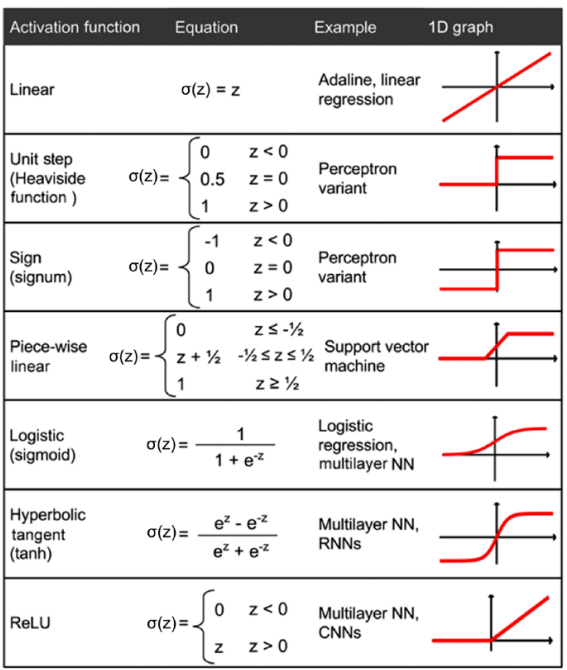